In [109]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models


In [111]:
# Veri setinin bulunduğu ana klasör yolu
data_dir = '/Users/cigdemavci/Desktop/goru2'

# Görselleri normalize etmek ve uygun formata getirmek için ImageDataGenerator kullanıyoruz
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Görselleri normalize et (0-1 arası değerler)
    validation_split=0.2  # %20'lik kısmı validation (test) için ayır
)

# Eğitim veri setini yükleyelim
train_generator = train_datagen.flow_from_directory(
    data_dir,  # Ana veri dizini
    target_size=(150, 150),  # Görsellerin boyutunu 150x150 olarak ayarlıyoruz
    batch_size=32,  # Her batch'te 32 resim kullanacağız
    class_mode='categorical',  # Çok sınıflı sınıflandırma problemi
    subset='training'  # Eğitim verisi için
)

# Test (Validation) veri setini yükleyelim
test_generator = train_datagen.flow_from_directory(
    data_dir,  # Ana veri dizini
    target_size=(150, 150),  # Görsellerin boyutunu 150x150 olarak ayarlıyoruz
    batch_size=32,  # Her batch'te 32 resim kullanacağız
    class_mode='categorical',  # Çok sınıflı sınıflandırma problemi
    subset='validation'  # Test verisi için
)

# Eğitim ve test veri seti başarıyla yüklendi
print(f"Eğitim veri seti: {len(train_generator.filenames)} resim")
print(f"Test veri seti: {len(test_generator.filenames)} resim")


Found 191 images belonging to 8 classes.
Found 44 images belonging to 8 classes.
Eğitim veri seti: 191 resim
Test veri seti: 44 resim


In [112]:
# CNN modelini oluştur
model = models.Sequential([
    # İlk convolutional layer ve max pooling
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),

    # İkinci convolutional layer ve max pooling
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Üçüncü convolutional layer ve max pooling
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Dördüncü convolutional layer ve max pooling
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Flatten layer
    layers.Flatten(),

    # Fully connected dense layers
    layers.Dense(512, activation='relu'),
    layers.Dense(train_generator.num_classes, activation='softmax')  # Çıkış katmanı
])

# Modeli derle
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Modelin özetini yazdır
model.summary()

/opt/miniconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_32 (Conv2D)              │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_32 (MaxPooling2D) │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_33 (Conv2D)              │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_33 (MaxPooling2D) │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_34 (Conv2D)              │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_34 (MaxPooling2D) │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_35 (Conv2D)              │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_35 (MaxPooling2D) │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 8)              │         4,104 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,456,712 (13.19 MB)

 Trainable params: 3,456,712 (13.19 MB)

 Non-trainable params: 0 (0.00 B)

In [113]:
# Modeli eğit
history = model.fit(
    train_generator,
    epochs=10,  # Eğitim için epoch sayısı
    validation_data=test_generator,  # Doğrulama veri seti
    callbacks=[early_stopping]  # Early stopping callback'i
)

Epoch 1/10


/opt/miniconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 257ms/step - accuracy: 0.1415 - loss: 2.1819 - val_accuracy: 0.1364 - val_loss: 2.0064
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 113ms/step - accuracy: 0.2269 - loss: 2.0140 - val_accuracy: 0.2045 - val_loss: 1.8298
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - accuracy: 0.3122 - loss: 1.7125 - val_accuracy: 0.4773 - val_loss: 1.4941
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step - accuracy: 0.5456 - loss: 1.2213 - val_accuracy: 0.6136 - val_loss: 1.4741
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 109ms/step - accuracy: 0.6699 - loss: 0.9786 - val_accuracy: 0.6136 - val_loss: 1.1302
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - accuracy: 0.7542 - loss: 0.7544 - val_accuracy: 0.6364 - val_loss: 1.2424
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - accuracy: 0.8063 - loss: 0.5517 - val_accuracy: 0.6818 - val_loss: 1.0778
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - accuracy: 0.8500 - loss: 0.4662 - val_accuracy: 0.7955 - val_loss: 0.8304
Epoch 

In [114]:
# Eğitim ve doğrulama (test) doğruluk oranlarını al
train_accuracy = history.history['accuracy'][-1]  # Son epoch'taki eğitim doğruluğu
val_accuracy = history.history['val_accuracy'][-1]  # Son epoch'taki doğrulama doğruluğu

# Hata oranlarını hesapla
train_error = 1 - train_accuracy
val_error = 1 - val_accuracy

print(f"Eğitim hata oranı: {train_error:.4f}")
print(f"Doğrulama hata oranı: {val_error:.4f}")

Eğitim hata oranı: 0.0471
Doğrulama hata oranı: 0.1591


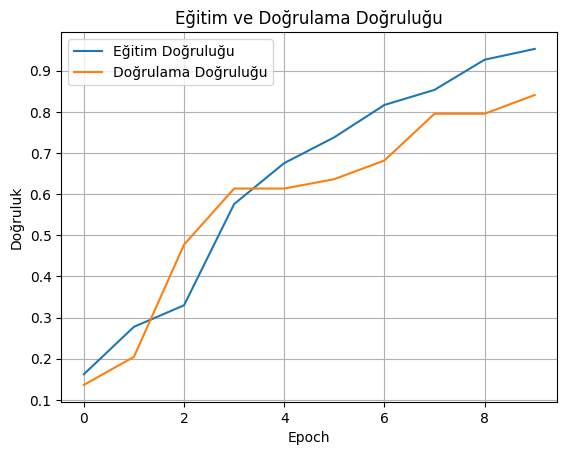

In [115]:
import matplotlib.pyplot as plt

# Eğitim ve doğrulama doğruluk oranlarını çiz
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')

# Grafiği düzenle
plt.title('Eğitim ve Doğrulama Doğruluğu')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.legend()
plt.grid()

# Grafiği göster
plt.show()

In [116]:
model.save('cnn_model.h5')  # Modeli 'cnn_model.h5' dosyasına kaydeder
print("Model başarıyla kaydedildi.")

Model başarıyla kaydedildi.


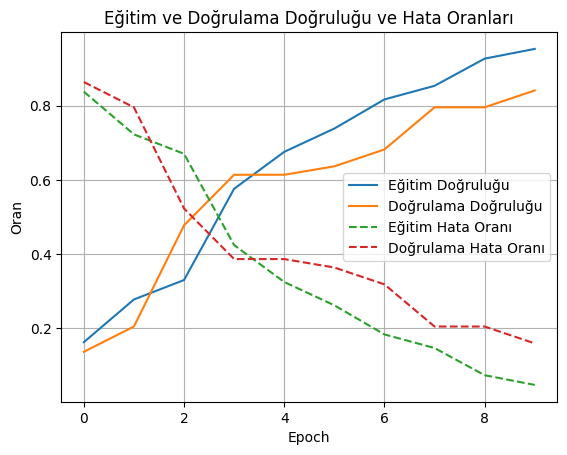

In [118]:
# Eğitim ve doğrulama doğruluk oranlarını ve hata oranlarını çiz
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.plot([1 - acc for acc in history.history['accuracy']], label='Eğitim Hata Oranı', linestyle='--')
plt.plot([1 - acc for acc in history.history['val_accuracy']], label='Doğrulama Hata Oranı', linestyle='--')

# Grafiği düzenle
plt.title('Eğitim ve Doğrulama Doğruluğu ve Hata Oranları')
plt.xlabel('Epoch')
plt.ylabel('Oran')
plt.legend()
plt.grid()

# Grafiği göster
plt.show()

In [131]:
import numpy as np
from sklearn.metrics import classification_report

# Test veri seti için tahminler yap
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)  # Tahmin edilen sınıflar
true_classes = test_generator.classes  # Gerçek sınıflar
class_labels = list(test_generator.class_indices.keys())  # Sınıf etiketleri

# Her kategori için doğruluk oranını hesapla
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
              precision    recall  f1-score   support

       araba       0.12      0.17      0.14         6
      bardak       0.25      0.20      0.22         5
  bilgisayar       0.00      0.00      0.00         6
    bisiklet       0.29      0.33      0.31         6
       canta       0.00      0.00      0.00         5
       insan       0.33      0.33      0.33         6
       kopek       0.25      0.20      0.22         5
     telefon       0.25      0.20      0.22         5

    accuracy                           0.18        44
   macro avg       0.19      0.18      0.18        44
weighted avg       0.19      0.18      0.18        44



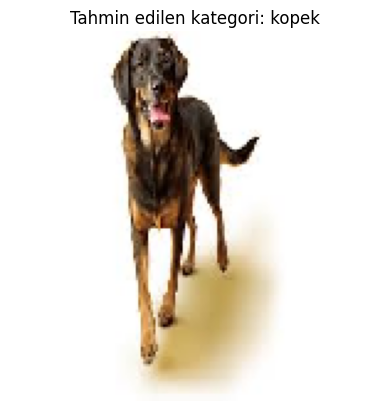

In [133]:
import matplotlib.pyplot as plt

# Resmi göster
plt.imshow(img)
plt.title(f"Tahmin edilen kategori: {predicted_category}")
plt.axis('off')  # Eksenleri kapat
plt.show()
